In [1]:
# WeatherPy, an analysis of cities across the globe, selected at random to determine if there is a relationship between latitude and various weather related metrics. Powered by Open Weather API.
# By Matt Taylor

In [35]:
# Importing dependencies
import json
import requests
from citipy import citipy
import random
from config import api_key
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

random.seed(42)

In [36]:
# Create an empty list to store random cities
city_list = []

# Creating a conditional loop which will continue to generate random numbers and search for cities until a specified amount of unique cities are found
while len(city_list) < 750:
    # Select a random latitude and longitude
    ran_lat = random.uniform(-0.9, 0.9) * 100
    ran_long = random.uniform(-1.8, 1.8) * 100

    # Using the Citipy module, find the nearest city for the given co-ordinates
    ran_city = citipy.nearest_city(ran_lat, ran_long)
    
    # If the city found is unique, add it to our list of cities
    if not ran_city.city_name in city_list:
        city_list.append(ran_city.city_name)

# Confirming the size of the list and therefore the number of unique cities found
print(f"Number of unique cities found is: {len(city_list)}")

Number of unique cities found is: 750


In [37]:
# Load the same list of cities that the Citipy module uses, so that we can find exact co-ordinates
path = "Resources/worldcities.txt"
coordinate_df = pd.read_csv(path, sep = ",")
coordinate_df = coordinate_df[["City", "Latitude", "Longitude"]].rename(columns = {"Latitude": "Lat", "Longitude": "Lng"})
# There are some cities that have the same name in different locations, for now we will eliminate duplicates with groupby
# Later we will use the Open Weather API to check if the value is accurate
coordinate_df = coordinate_df.groupby("City").mean()

In [39]:
# Create a dataframe to store data from upcoming API calls
city_df = pd.DataFrame(city_list)
city_df.columns = ["City"]

# Perform a left merge on the new dataframe with the co-ordinate datafram
city_df = pd.merge(city_df, coordinate_df, how = "left", on = "City")

# Adding empty placeholder columns
city_df["Max Temp"] = ""
city_df["Humidity"] = ""
city_df["Cloudiness"] = ""
city_df["Wind Speed"] = ""
city_df["Country"] = ""
city_df["Date"] = ""

# Previewing the dataframe
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.078333,-159.321944,,,,,,
1,ancud,-41.869722,-73.820278,,,,,,
2,gazli,40.133333,63.450000,,,,,,
3,college,64.856944,-147.802778,,,,,,
4,satitoa,-13.983333,-171.366667,,,,,,


In [40]:
# Call the Open Weather API to search each city and populate the dataframe with information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

print("Beginning Data Retreival")
print("-----------------------------")

for index, city in city_df.iterrows():
    
    # Take the city name from the current row, stored in the column "City" and build the endpoint URL
    city_name = city["City"]
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + city_name

    # Try query the API endpoint, if the city is found, append the data we are looking for to the current row of the dataframe
    try:
        response = requests.get(query_url)
        city_data = response.json()
        
        # Check the current Lat and Lng values stored, if they differ from the API, update, otherwise leave the same
        if city_data["coord"]["lat"] != round(city_df.loc[index, "Lat"],2):
            city_df.loc[index, "Lat"] = city_data["coord"]["lat"]
        
        if city_data["coord"]["lon"] != round(city_df.loc[index, "Lng"],2):
            city_df.loc[index, "Lng"] = city_data["coord"]["lon"]        
    
        # Store the maximum temperature
        city_df.loc[index, "Max Temp"] = city_data["main"]["temp_max"]

        # Store the humidity
        city_df.loc[index, "Humidity"] = city_data["main"]["humidity"]

        # Store the cloudiness
        city_df.loc[index, "Cloudiness"] = city_data["clouds"]["all"]

        # Store the wind speed
        city_df.loc[index, "Wind Speed"] = city_data["wind"]["speed"]

        # Store the country
        city_df.loc[index, "Country"] = city_data["sys"]["country"]

        # Store the date
        city_df.loc[index, "Date"] = city_data["dt"]

        # Acknowledge that all of the records have been collected and print a confirmation
        print(f"Processing Record {index + 1} | {city_name}")
        
    except:
        # If the API endpoint cannot be found, skip that particular row/city
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retreival
-----------------------------
Processing Record 1 | kapaa
Processing Record 2 | ancud
Processing Record 3 | gazli
Processing Record 4 | college
City not found. Skipping...
Processing Record 6 | cape town
Processing Record 7 | punta arenas
Processing Record 8 | sabha
Processing Record 9 | port alfred
Processing Record 10 | provideniya
Processing Record 11 | isilkul
Processing Record 12 | rikitea
Processing Record 13 | upernavik
Processing Record 14 | mataura
Processing Record 15 | pudozh
Processing Record 16 | kolyvan
Processing Record 17 | butaritari
Processing Record 18 | gobabis
Processing Record 19 | soligalich
Processing Record 20 | kajaani
Processing Record 21 | coihaique
Processing Record 22 | ushuaia
Processing Record 23 | codrington
Processing Record 24 | puerto ayora
Processing Record 25 | batemans bay
Processing Record 26 | umm lajj
Processing Record 27 | busselton
City not found. Skipping...
Processing Record 29 | kavaratti
Processing Record 30 | tur

Processing Record 252 | san policarpo
City not found. Skipping...
Processing Record 254 | bonthe
Processing Record 255 | lata
City not found. Skipping...
Processing Record 257 | namtsy
Processing Record 258 | tupiza
Processing Record 259 | nome
Processing Record 260 | praia da vitoria
Processing Record 261 | cidreira
Processing Record 262 | kampong cham
Processing Record 263 | kamenka
Processing Record 264 | ulundi
Processing Record 265 | umm kaddadah
Processing Record 266 | plettenberg bay
Processing Record 267 | lasa
Processing Record 268 | saint-francois
Processing Record 269 | buraydah
City not found. Skipping...
Processing Record 271 | jiaojiang
Processing Record 272 | cockburn town
Processing Record 273 | mwense
Processing Record 274 | stornoway
Processing Record 275 | goryachegorsk
Processing Record 276 | fowa
Processing Record 277 | tigil
Processing Record 278 | arman
Processing Record 279 | jamestown
Processing Record 280 | mangan
Processing Record 281 | north bend
Processing 

Processing Record 501 | tilichiki
Processing Record 502 | taoudenni
Processing Record 503 | eyl
Processing Record 504 | evensk
Processing Record 505 | along
Processing Record 506 | broome
City not found. Skipping...
Processing Record 508 | sakakah
Processing Record 509 | tabou
City not found. Skipping...
Processing Record 511 | yichang
Processing Record 512 | aklavik
Processing Record 513 | abaete
Processing Record 514 | senanga
Processing Record 515 | fukue
Processing Record 516 | naze
Processing Record 517 | sulangan
Processing Record 518 | deputatskiy
Processing Record 519 | hammerfest
City not found. Skipping...
Processing Record 521 | mount isa
Processing Record 522 | benicarlo
Processing Record 523 | kupang
Processing Record 524 | otane
Processing Record 525 | porto de moz
Processing Record 526 | birjand
Processing Record 527 | kachiry
Processing Record 528 | ardabil
Processing Record 529 | rio grande
Processing Record 530 | imbituba
Processing Record 531 | luderitz
Processing Re

In [42]:
# For the rows where the city data was not found, drop those rows from the dataframe
NaN = float("NaN")
city_df.replace("", NaN, inplace=True)
city_df.dropna(subset = ["Max Temp"], inplace=True)

# Export dataframe to a CSV
path = "output/city_data.csv"
city_df.to_csv(path, index=False)

# Preview the dataframe created for our analysis
print(len(city_df))
city_df.head()

695


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.078333,-159.321944,80.60,74.0,20.0,13.87,US,1.601205e+09
1,ancud,-41.869722,-73.820278,45.00,94.0,30.0,1.28,CL,1.601205e+09
2,gazli,40.133333,63.450000,73.80,18.0,21.0,14.54,UZ,1.601205e+09
3,college,64.856944,-147.802778,39.20,86.0,20.0,8.05,US,1.601205e+09
5,cape town,-33.925839,18.423218,62.01,51.0,75.0,5.82,ZA,1.601205e+09


In [43]:
# Using describe to quickly look at the summary statistics, we can determine there are no cities with >100% humidity by the max value in the humidity column
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,695.000000,695.000000,695.000000,695.000000,695.00000,695.000000,6.950000e+02
mean,20.276371,21.525517,66.981309,68.987050,50.71223,8.070417,1.601205e+09
std,33.142734,87.041799,17.108418,23.712765,38.03556,5.228003,6.246730e+01
min,-54.800000,-175.200000,11.050000,2.000000,0.00000,0.070000,1.601205e+09
25%,-7.400000,-56.720000,54.000000,56.000000,11.00000,4.430000,1.601205e+09
50%,26.325986,24.360000,68.000000,76.000000,54.00000,6.930000,1.601205e+09
75%,47.547038,95.268333,79.410000,87.000000,90.00000,10.795000,1.601205e+09
max,78.216667,179.316667,112.480000,100.000000,100.00000,39.150000,1.601205e+09


## Plotting the data

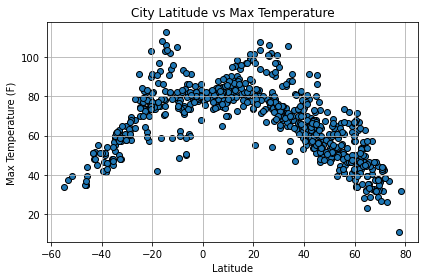

In [44]:
# Plotting the data of latitude vs max temperature
x_values = city_df["Lat"]
y_values = city_df["Max Temp"]

plt.scatter(x_values,y_values, edgecolors = "black")

plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()
plt.tight_layout()

plt.savefig("output/Fig1.png")
plt.show()

### Latitude vs Max Temperature
* By simply looking at the plot generated, it appears that there is a correlation between latitude and max temperature
* The max temperature tends to reach it's maximum as latitude approaches 0 (the equator) which we would expect

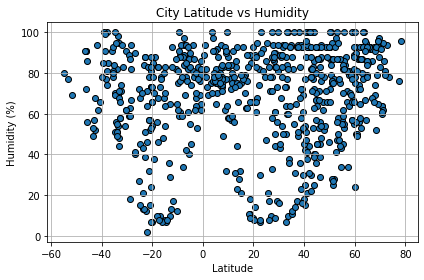

In [45]:
# Plotting the data of latitude vs humidity
y_values = city_df["Humidity"]

plt.scatter(x_values,y_values, edgecolors = "black")

plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()
plt.tight_layout()

plt.savefig("output/Fig2.png")
plt.show()

### Latitude vs Humidity
* There does not appear to be a relationship between latitude and humidity
* We are plotting relative humidity, which normalises the effect temperature has on absolute humidity, therefore it makes sense to see no relationship in the plot

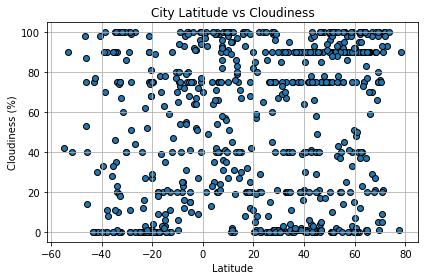

In [46]:
# Plotting the data of latitude vs cloudiness
y_values = city_df["Cloudiness"]

plt.scatter(x_values,y_values, edgecolors = "black")

plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()
plt.tight_layout()

plt.savefig("output/Fig3.png")
plt.show()

### Latitude vs Cloudiness
* There does not appear to be a relationship between latitude and cloudiness in this dataset
* According to the Wikipedia page for cloud cover (cloudiness), there shoud be a weak relationship showing that cloudiness is lower around the equator
* However, it is also true that cloudiness is highly variable, it could be true that there was no observable relationship at the timepoint selected
* https://en.wikipedia.org/wiki/Cloud_cover

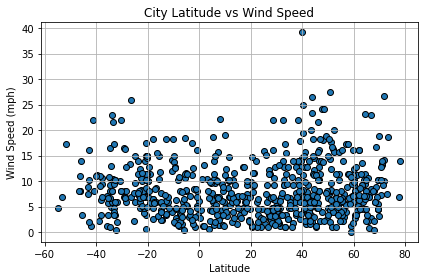

In [47]:
# Plotting the data of latitude vs wind speed
y_values = city_df["Wind Speed"]

plt.scatter(x_values,y_values, edgecolors = "black")

plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid()
plt.tight_layout()

plt.savefig("output/Fig4.png")
plt.show()

### Latitude vs Wind Speed
* There does not appear to be a relationship between latitude and wind speed
* According to the Wikipedia page for wind speed, there are significantly more factors than simply latitude (or temperature) in determining wind speed, therefore it makes sense that we see little to no relationship
* https://en.wikipedia.org/wiki/Wind_speed

## Linear Regression

In [48]:
# Seperating the dataframe into Northern and Southern hemisphere
north_hem_df = city_df.loc[city_df["Lat"] >= 0, :]
south_hem_df = city_df.loc[city_df["Lat"] < 0, :]

In [49]:
# Defining a function to gather the outputs of the linear regression to be re-used for the upcoming analysis
def lin_regress(x, y):
    (slope, intercept, r, p, stderr) = st.linregress(x, y)
    line_eq = slope * x + intercept
    line_str = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return [r, line_eq, line_str]


The r-squared value is: 0.6692790994757067



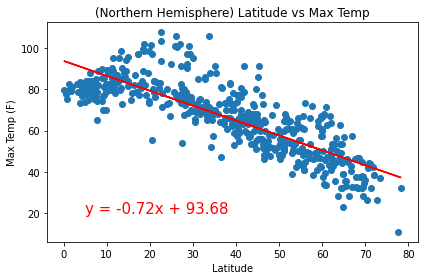

In [50]:
# Plotting the data of latitude vs max temperature for only the Northern Hemisphere, and performing a linear regression
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Max Temp"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(5, 20),fontsize=15,color="red")

plt.title("(Northern Hemisphere) Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Displaying the results
plt.tight_layout()
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()


The r-squared value is: 0.5039211632708889



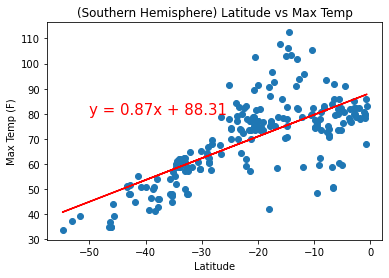

In [51]:
# Plotting the data of latitude vs max temperature for only the Southern Hemisphere, and performing a linear regression
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Max Temp"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(-50, 80),fontsize=15,color="red")

plt.title("(Southern Hemisphere) Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Displaying the results
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()

### Latitude vs Max Temp (Northern vs Southern Hemisphere)
* When splitting the latitude data by hemisphere, we can see the two linear relationships which contribute to the overall parabolic relationship observed previously in this analysis
* The Northern hemisphere data shows a strong negative correlation, while the Southern hemisphere data shows a strong positive correlation as the cities move further away from the equator in either direction


The r-squared value is: 0.00974728423981426



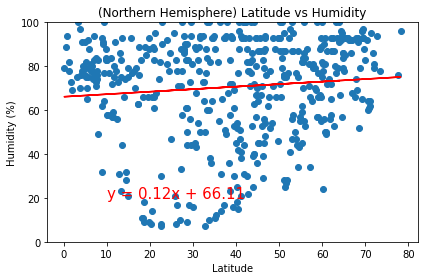

In [52]:
# Plotting the data of latitude vs humidity for only the Northern Hemisphere, and performing a linear regression
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Humidity"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(10, 20),fontsize=15,color="red")

plt.title("(Northern Hemisphere) Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 100)

# Displaying the results
plt.tight_layout()
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()


The r-squared value is: 0.0023731233905501694



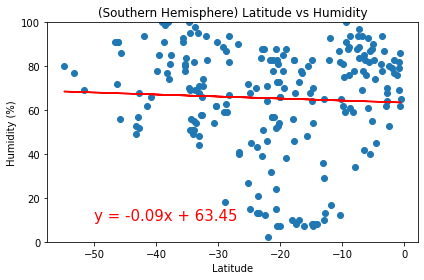

In [53]:
# Plotting the data of latitude vs humidity for only the Southern Hemisphere, and performing a linear regression
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Humidity"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(-50 ,10),fontsize=15,color="red")

plt.title("(Southern Hemisphere) Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 100)

# Displaying the results
plt.tight_layout()
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()

### Latitude vs Humidity (Northern vs Southern Hemisphere)
* Similar to the previous analysis, there appears to be little to no relationship between the variables latitude and humidity
* This is mainly because the measure of humidity used is relative humidity, rather than absolute humidity
* Splitting the data into the Northern and Southern hemispheres does not show any further relationships and suggests that latitude has no bearing on relative humidity


The r-squared value is: 0.002683708853040298



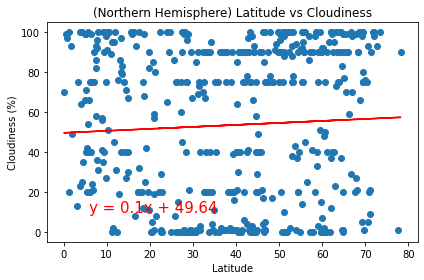

In [54]:
# Plotting the data of latitude vs cloudiness for only the Northern Hemisphere, and performing a linear regression
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Cloudiness"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(6,10),fontsize=15,color="red")

plt.title("(Northern Hemisphere) Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Displaying the results
plt.tight_layout()
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()


The r-squared value is: 0.010193532938225969



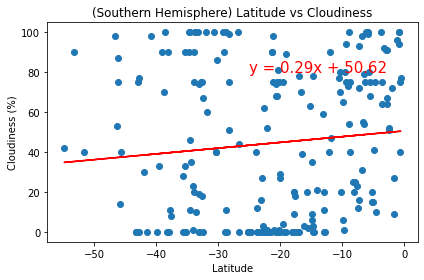

In [55]:
# Plotting the data of latitude vs cloudiness for only the Northern Hemisphere, and performing a linear regression
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Cloudiness"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(-25, 80),fontsize=15,color="red")

plt.title("(Southern Hemisphere) Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Displaying the results
plt.tight_layout()
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()

### Latitude vs Cloudiness (Northern vs Southern Hemisphere)
* Similar to the previous analysis, there appears to be little to no relationship between latitude and cloudiness
* Even after splitting the data into Northern and Southern, we still cannot observe a decrease in cloudiness around the equator


The r-squared value is: 0.021130378901879614



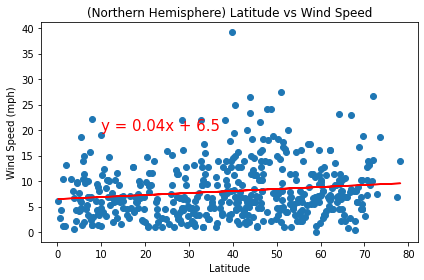

In [56]:
# Plotting the data of latitude vs wind speed for only the Northern Hemisphere, and performing a linear regression
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Wind Speed"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(10, 20),fontsize=15,color="red")

plt.title("(Northern Hemisphere) Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Displaying the results
plt.tight_layout()
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()


The r-squared value is: 0.02418666585387783



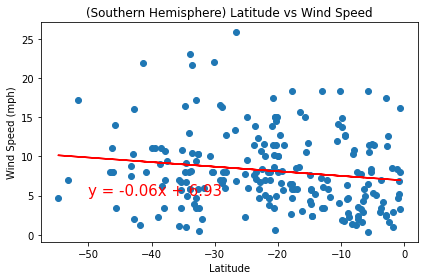

In [57]:
# Plotting the data of latitude vs wind speed for only the Southern Hemisphere, and performing a linear regression
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Wind Speed"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(-50, 5),fontsize=15,color="red")

plt.title("(Southern Hemisphere) Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Displaying the results
plt.tight_layout()
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()

### Latitude vs Wind Speed (Northern vs Southern Hemisphere)
* Similar to the previous analysis, there appears to be little to no relationship between latitude and wind speed
* Splitting the data into the Northern and Southern hemispheres does not show any further relationships and suggests that latitude has little to no bearing on wind speed